# Analyzing the COVID-19

## Imports

In [12]:
import pandas as pd

In [13]:
from matplotlib import pyplot as plt

## Loading Data

In [14]:
url = 'http://cowid.netlify.com/data/full_data.csv'

In [15]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')

df = pd.read_csv(url, parse_dates=['date'], date_parser=dateparse)

In [16]:
df

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2020-02-25,Afghanistan,NaN,NaN,1,NaN
1,2020-02-26,Afghanistan,0.0,NaN,1,NaN
2,2020-02-27,Afghanistan,0.0,NaN,1,NaN
3,2020-02-28,Afghanistan,0.0,NaN,1,NaN
4,2020-02-29,Afghanistan,0.0,NaN,1,NaN
...,...,...,...,...,...,...
2020,2020-03-07,Worldwide,3730.0,104.0,101927,3486.0
2021,2020-03-08,Worldwide,3644.0,96.0,105592,3584.0
2022,2020-03-09,Worldwide,3979.0,224.0,109577,3809.0
2023,2020-03-10,Worldwide,4119.0,201.0,113702,4012.0


### Adding a days column

In [17]:
df['date'] - df['date'].min()

0      35 days
1      36 days
2      37 days
3      38 days
4      39 days
         ...  
2020   46 days
2021   47 days
2022   48 days
2023   49 days
2024   50 days
Name: date, Length: 2025, dtype: timedelta64[ns]

In [18]:
df['days'] = df['date'] - df['date'].min()

### Picking only countries of interest

In [19]:
dfs = df[df['location'].isin(['India', 'China'])]

## Getting the total cases per country

In [20]:
df_total_cases_all_countries = dfs[['location', 'days', 'total_cases']].groupby(['location', 'days']).sum().unstack('location')['total_cases']

In [21]:
df_total_cases_all_countries

location,China,India
days,,
0 days,278.0,NaN
1 days,310.0,NaN
2 days,574.0,NaN
3 days,835.0,NaN
4 days,1297.0,NaN
5 days,1985.0,NaN
6 days,2761.0,NaN
7 days,4537.0,NaN
8 days,5997.0,NaN


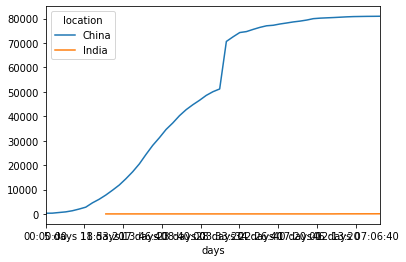

In [22]:
df_total_cases_all_countries.plot()

## Looking at Worldwide Data

In [76]:
dfWW = df[df['location'] == 'Worldwide'][['days', 'total_cases', 'total_deaths']].groupby('days').sum()

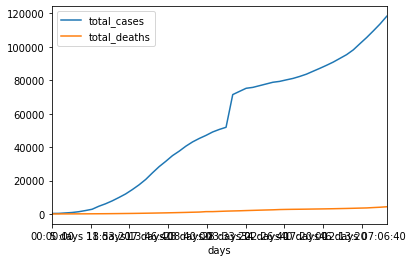

In [77]:
dfWW.plot()

## Looking at Worldwide Data

In [84]:
dfCh = df[df['location'] == 'China'][['days', 'total_cases', 'total_deaths']].groupby('days').sum()

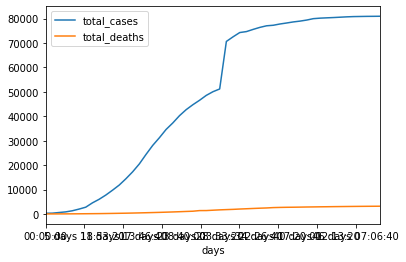

In [85]:
dfCh.plot()

## Looking at India Data

In [82]:
dfIN = df[df['location'] == 'India'][['days', 'total_cases', 'total_deaths']].groupby('days').sum()

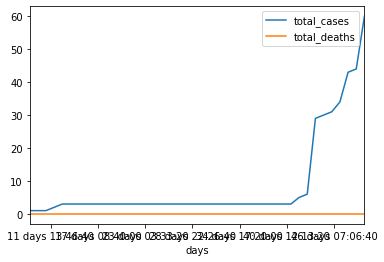

In [88]:
dfIN.plot()